# Steady One-Dimensional Heat Diffusion

## Problem Definition

In this lesson, we explore the solution of the steady, one-dimensional heat diffusion equation, given by:

$$ - k\nabla^2T - S = 0 $$

Note that all terms have been brought to the left side of the equation (i.e. the side where the transient term would normally appear) due to our choice of sign convention where $a_P$ coefficients must be positive. It is equally possible to move everything to the right side of the equation (including the transient term), but then $a_P$ coefficients would be required to be negative while $a_{nb}$ coefficients would be required to be positive. It should also be noted that boundary conditions are required to solve this problem; these will be discussed later.

## Discretization

Based on the previous lession, the diffusion term can be discretized as:

$$ \int_S \mathbf{J}\cdot\mathbf{n} dS 
   \approx \sum_{i=0}^{N_{ip}-1} \mathbf{J}_{ip}\cdot\mathbf{n}_{ip}A_{ip}
$$

Since the diffusive flux is $\mathbf{J} = -k\nabla T$:

$$ \int_S \mathbf{J}\cdot\mathbf{n} dS 
   = - \sum_{i=0}^{N_{ip}-1} k_{ip} \nabla T_{ip} \cdot\mathbf{n}_{ip}A_{ip}
$$

For now, we will assume that the thermal conductivity is constant in space and time, so $k_{ip} = k$ and can be taken outside of the summation. The diagram below shows a one-dimensional control volume, where the unit vectors on each of the faces is shown.

![OneDimControlVolume](Figures/2-OneDimControlVolume.png)

Based on this, the discretized diffusion term may be simplified as:

$$ - \sum_{i=0}^{N_{ip}-1} k_{ip} \nabla T_{ip} \cdot\mathbf{n}_{ip}A_{ip}
   = k \left. \frac{\partial T}{\partial x} \right|_w A_w - k \left. \frac{\partial T}{\partial x} \right|_e A_e
$$

since $\nabla T\cdot \mathbf{i} = \partial T/\partial x$. The following diagram defines the cell locations and the nomenclature for the distances between them:

![OneDimControlVolumeNomenclature](Figures/2-OneDimControlVolumeNomenclature.png)

The derivatives in the diffusion term can then be approximated using finite differences, resulting in:

$$ k \left. \frac{\partial T}{\partial x} \right|_w A_w - k \left. \frac{\partial T}{\partial x} \right|_e A_e
   = k \frac{T_P - T_W}{\Delta x_{WP}} A_w - k \frac{T_E - T_P}{\Delta x_{PE}} A_e
$$

The discretized source term is simply:

$$ \int_V S dV \approx S_P V_P $$

where $S_P$ is the value of the source term calculated within the cell and $V_P$ is the cell volume. Putting everything together on one side of the equation, we can form the residual for the cell $P$ as:

$$ r_P = - k \frac{T_E - T_P}{\Delta x_{PE}} A_e + k \frac{T_P - T_W}{\Delta x_{WP}} A_w - S_P V_P $$

We can also express in terms of diffusive fluxes through each face, $F^d$, as:

$$ r_P = F^d_e - F^d_w - S_P V_P $$

where

$$ F^d_e = - k \frac{T_E - T_P}{\Delta x_{PE}} A_e = - D_e \left(T_E - T_P\right) $$

$$ F^d_w = - k \frac{T_P - T_W}{\Delta x_{WP}} A_w = - D_w \left(T_P - T_W\right) $$

where the coefficeints $D_e$ and $D_w$ are defined as

$$ D_e = \frac{k A_e}{\Delta x_{PE}} $$

$$ D_w = \frac{k A_w}{\Delta x_{WP}} $$

The cell residual is then:

$$ r_P = D_w \left(T_P - T_W\right) - D_e \left(T_E - T_P\right) - S_P V_P $$

We then calculate the linearization coefficients as:

$$ a_P = \frac{\partial r_P}{\partial T_P} = D_w + D_e - \frac{\partial S_P}{\partial T_P} V_P$$

$$ a_W = \frac{\partial r_P}{\partial T_W} = - D_w $$

$$ a_E = \frac{\partial r_P}{\partial T_E} = - D_e $$

It can be seen that the signs of the coefficients are correct according to Rule 2 from the previous lesson.

Based on this descretization we can form an algebraic system of equatons at each control volume, i.e. 

$$ a_P\delta T_P + a_W \delta T_W + a_E \delta T_E = - r_P $$

Writing a similar equation for each cell in the domain, a linear system can be derived that has a form as depicted in the following figure:

![LinearSystem](Figures/2-LinearSystem.png)

It may be noticed that the first and last row only have two non-zero entries instead of three. This is because these rows correspond to control volumes adjacent to the domain boundaries, which require boundary conditions to be applied. This will be discussed in more detail later.

In matrix notation, we are solving the linear system:

$$ \mathbf{A}\mathbf{x} = \mathbf{b} $$

where $A$ is the Jacobian matrix and $\mathbf{b}=-\mathbf{r}$ is the negative of the residual vector. The solution, $\mathbf{x}=\delta\mathbf{T}$ is the solution correction. With each iteration, the solution is updated according to the relation:

$$ \mathbf{T} = \mathbf{T}_i + \delta\mathbf{T}_i $$

where the subscript $i$ refers to the current iteration.

### Source Terms

The source term can take on a variety of different forms, depending on the type of heat source being modelled. In this lesson, and the associated assignment, we will focus on external convection and radiation exchange.

For external convection:

$$ \frac{S_{conv,P}}{V_P} = - h A_o (T_P - T_{\infty, c}) $$

where $h$ is the convection coefficient, $A_o$ is the external surface area of the cell $P$, $T_P$ is the temperature at the centroid of cell $P$, and $T_{\infty, c}$ is the ambient temperature for the convection process. Note that the negative sign appears since heat is leaving the control volume when $T_P > T_{\infty, c}$.

For radiation:

$$ \frac{S_{rad}}{V_P} = - \epsilon\sigma A_o (T_P^4 - T_{\infty,r}^4) $$

where $\epsilon$ is the surface emissivity, $\sigma$ is the Stefan-Boltzmann constant, and $T_{\infty, r}$ is the surroundings temperature for radiation exchange.

## Discussion of Discretization Procedure

### Temperature Profile Assumptions

In computing the diffusive fluxes through the integration point faces, we implicitly assumed a piecewise-linear profile for the temperature, as shown below. This choice is natural, given that it ensures that the derivatives are defined at the integration points. This is required for flux consistency at control-volume faces, as required by Rule 1 in the previous lesson. For an assumed piecewise-constant profile, the derivatives would be undefined at the integration points, and fluxes would not be consistent.

![PiecewiseProfiles](Figures/2-PiecewiseProfiles.png)

For calculations of source terms, the piecewise-constant assumption is used, which implies a single value of the source term in each cell.

### Implementation of Linearization 

It is also worthwhile noting that linearization has been treated as part of the discretization scheme, since we have developed the equations in "correction" mode, where the solution of the linear system is actually the correction that needs to be applied to the previous iteration of the solution. This is in contrast to the method of Patankar, where the solution of the linear system is the solution for the variables at the control volume centres. Although the methods can be shown to be equivalent, the correction mode is preferred for two main reasons:

- At convergence, the solution for the correction goes to zero, making zero a good intial guess for the linear solver.
- The residual vector is computed as a part of forming the linear system. Since the residual vector is needed to assess convergence, there is some additional computation required in the Patankar method for this calculation.

<div class="alert alert-info">

**Exercise:** Review the Patankar method for discretization of the steady diffusion equation considered, and compare with the method shown in these notes. This will be further discussed in class.

</div>

### Properties of the Discrete Algebraic Equations

In order to have the correct physical influence, the coefficients must have a particular sign. Specifically, $a_P$ must be positive, while $a_W$ and $a_E$ must be negative, according to Rule 2 in the previous lesson. To elaborate further on this concept, consider the case with no sources, where the discrete algebraic equation for the control volume $P$ is given as:

$$ a_P\delta T_P + a_W\delta T_W + a_E\delta T_W = - r_P $$

If we assume that the solution is converged, then $r_P \rightarrow 0$, resulting in: 

$$ a_P\delta T_P = - a_W\delta T_W - a_E\delta T_W $$

Then, suppose that either $T_W$ or $T_E$ were perturbed. If either of these temperature were to rise, the correct physical effect would be for $T_P$ to also rise. Similarly, if either temperature were to drop, $T_P$ should also drop. Therefore, if $a_P > 0$, it is required that both $a_W < 0$ and $a_E < 0$ to ensure the correct physical effect. If this criterion is violated, it can be manifest as poor convergence (or divergence) of the numerical method or non-physical oscillation in the converged profile.

It is further noted that the discrete algebraic equations are independent of units, i.e. $T + \Delta T$ also satisfies the equations when there are no source terms, in accordance with Rule 4 in the previous lesson. This implies that temperatures in either Kelvin or Celsius will both satisfy the same algebraic equations. The same is true for certain source terms, such as convection, where a temperature difference is involved. For source terms like radiation, the equations are not independent of units.

<div class="alert alert-info">

**Exercise:** Show that $T + \Delta T$ satisfies the same equations as $T$ when there are no source terms.

</div>

We can also demonstrate that the equations are conservative over any number of cells. Let us consider two cells, $P$ and $E$ (shown below), and add the discrete equations together.

![CombinedCv](Figures/2-CombinedCv.png)

The equation for control volume $P$ at convergence ($r_P = 0$) is:

$$ F^d_{e,P} - F^d_{w,P} - S_P V_P = 0 $$

For control volume $E$ it is:

$$ F^d_{e,E} - F^d_{w,E} - S_E V_E = 0 $$

Adding these equations together gives:

$$ F^d_{e,P} - F^d_{w,P} + F^d_{e,E} - F^d_{w,E} - S_P V_P - S_E V_E = 0 $$

It is noted that $F^d_{e,P} = F^d_{w,E}$, since these terms represent the diffusive flux across the face shared by volumes $P$ and $E$. If these terms were not equal, it would imply that there was a fictituous energy source at the face, which is not reasonable. Cancelling out these terms gives the combined algebraic equation for control volumes $P$ and $E$:

$$ F^d_{e,E} - F^d_{w,P} - S_P V_P - S_E V_E = 0 $$

This equation clearly represents a balance of the total source term within the combined control volume with the net diffusive flux from that same control volume. Therefore, integral conservation has been demonstrated. This applies for any group of control volumes, including the entire domain.

The important feature of the discretization that lead to the integral conservation property was that $F^d_{e,P} = F^d_{w,E}$. In our discretization:

$$ F^d_{e,P} = - k \frac{T_E - T_P}{\Delta x_{PE}} A_{e,P} $$
$$ F^d_{w,E} = - k \frac{T_E - T_P}{\Delta x_{PE}} A_{w,E} $$

Since $A_{e,P} = A_{w,E}$ simply by the geometry of the grid, it is in fact the two-point finite difference estimation of the derivative that has lead to the fluxes being equal. This is because of the piecewise-linear assumption that was made in the discretization process. Had we chosen to fit a parabolic curve from each side to determine the derivatives, there is no assurance that the face fluxes would be equal, which would cause the solution not to be conservative. In other words, we would have:

$$ F^d_{e,P} = f(T_W, T_P, T_E) $$
$$ F^d_{w,E} = f(T_P, T_E, T_{EE}) $$

This shows that the flux through the common face depends on different cell temperatures, which cannot assure that the derivative from either side is consistent. This is illustrated in the diagram below:

![ParabolicProfiles](Figures/2-ParabolicProfiles.png)

## Implementation

In order to solve this problem, we will need to implement Python classes that:

- Store the computational grid, including all relevant dimensions and properties
- Store the discretization coefficients
- Compute boundary values
- Compute diffusion fluxes and linearization coefficients
- Solve the linear algebraic system resulting from the discretization (mostly implemented using [SciPy](https://www.scipy.org) libraries)

We will also need to write some code to set up the problem using the classes that we will have written. Let's get started!

## Class Defining a One-Dimensional Cartesian Grid

In order to solve any sort of problem using the finite volume method, we need to start with a grid on which we discretize our equations. As such, any computational code typically must start by defining some sort of data structure to store the grid quantities, along with code to calculate relevant grid parameters. The problem presently being solved requires just a simple one-dimensional Cartesian grid, as implemented in the code cell below. 

In Python, every class must include a method called ``__init__``, which is invoked any time a new instance of the class is created. This method is commonly called a *constructor*, since it is used to construct a new object.

<div class="alert alert-success">

**Tip:** Review the structure of [Python classes](https://docs.python.org/3.6/tutorial/classes.html) by reading sections 9.1-9.3 in the linked article.

</div>

The constructor for the class ``Grid`` takes four arguments, as listed in the following table.

Variable    | Description
:----------:| :------------------------: 
`lx`        | total length of domain in x-direction [m]
`ly`        | total length of domain in y-direction [m]
`lz`        | total length of domain in z-direction [m]
`ncv`       | number of control volumes in domain

These variables must be provided by the user of the class. The nomenclature implemented in this class (and others to follow) is to denote private member variables with preceding underscores. Although Python does not prevent access to these private member variables like other compiled languages (e.g. C++), it is a good practice to mark them as such, to warn users of the class that they should not be accessing these members (risking unexpected behaviour if they do). Also, this class has several methods marked with the [`@property` decorator](https://docs.python.org/3/library/functions.html#property). This allows users of the class to read the private member variables with controlled access. Here, no methods are provided to set these values, only those to get them. This is because all mesh geometry is calculated internally and the user should never change this, but they do require the ability to access it.

A summary of the variables provided by this class is:

Variable    | Description                                         | Array dimension
:----------:| :--------------------------------------------------:|:---------------:
`ncv`       | number of control volumes in domain                 | N/A
`xf`        | array of x locations of face integration points [m] | `ncv+1`
`xP`        | array of x locations of cell centroids [m]          | `ncv+2`
`dx_WP`     | array of distances from W cell to P cell [m]        | `ncv`
`dx_PE`     | array of distances from P cell to E cell [m]        | `ncv`
`Af`        | array of face areas [m$^2$]                         | `ncv+1`
`Aw`        | array of west face areas [m$^2$]                    | `ncv`
`Ae`        | array of east areas [m$^2$]                         | `ncv`
`Ao`        | array of outer surface areas [m$^2$]                | `ncv`
`vol`       | array of cell volumes [m$^3$]                       | `ncv`

In general arrays relating to face-based quantities have dimension `ncv+1` (since this includes the boundary faces) and cell-based quantities have dimension `ncv`. The exception is the array `xP` which has dimension `ncv+2` to account for 'virual cells' located on the boundaries with zero thickness.  The virtual cells are employed simply to make interpolations at the boundaries more straightforward, as will be seen in the code. A diagram showing the storage scheme for `xP` including the virtual cells on the boundaries is given below. For convenience, functions are also included to return arrays containing the face areas on the east and west sides of each control volume (i.e. `Aw` and `Ae`). These functions are simply taking data out of `af` and are not strictly needed, but make subsequent more readable. Similarly, functions are provided to return the distances $\Delta x_{WP}$ and $\Delta x_{PE}$.

![VirtualControlVolumes](Figures/2-VirtualControlVolumes.png)

Note that this class makes use of the [numpy](http://www.numpy.org) library, as indicated by the first line, ``import numpy as np``.

<div class="alert alert-success">

**Tip:** Review the [NumPy Quickstart Guide](https://docs.scipy.org/doc/numpy/user/quickstart.html) and keep this link handy for future reference.

</div>


In [1]:
import numpy as np

class Grid:
    """Class defining a one-dimensional Cartesian grid"""
    
    def __init__(self, lx, ly, lz, ncv):
        """Constructor
            lx .... total length of domain in x-direction [m]
            ly .... total length of domain in y-direction [m]
            lz .... total length of domain in z-direction [m]
            ncv ... number of control volumes in domain
        """
        # Store the number of control volumes
        self._ncv = ncv
        
        
        # Calculate the control volume length
        dx = lx/float(ncv)
        
        # Calculate the face locations
        self._xf = np.array([i*dx for i in range(ncv+1)])
        
        # Calculate the cell centroid locations
        self._xP = np.array([self._xf[0]] + 
                            [0.5*(self._xf[i]+self._xf[i+1]) for i in range(ncv)]
        +
                            [self._xf[-1]])
        
        # Calculate face areas
        self._Af = ly*lz*np.ones(ncv+1)
        
        # Calculate the outer surface area for each cell
        self._Ao = (2.0*dx*ly + 2.0*dx*lz)*np.ones(ncv)
        
        # Calculate cell volumes
        self._vol = dx*ly*lz*np.ones(ncv)
        
    @property
    def ncv(self):
        """Number of control volumes in domain"""
        return self._ncv
    
    @property
    def xf(self):
        """Face location array"""
        return self._xf
    
    @property
    def xP(self):
        """Cell centroid array"""
        return self._xP
    
    @property
    def dx_WP(self):
        return self.xP[1:-1]-self.xP[0:-2]
        
    @property
    def dx_PE(self):
        return self.xP[2:]-self.xP[1:-1]
      
    @property
    def Af(self):
        """Face area array"""
        return self._Af

    @property
    def Aw(self):
        """West face area array"""
        return self._Af[0:-1]
    
    @property
    def Ae(self):
        """East face area array"""
        return self._Af[1:]
    
    @property
    def Ao(self):
        """Outer face area array"""
        return self._Ao
    
    @property
    def vol(self):
        """Cell volume array"""
        return self._vol

## Class Defining the Set of Coefficients

In addition to providing a class that defines the grid, it is useful to implement a class that can be used to store the terms that are used to form the linear system that is to be solved. While raw arrays could be used for this purpose, an object-oriented design is preferred because it allows us to provide some extra functionality, such as the function `zero` which zeros all of the arrays. This design also prevents us from having to pass around a lot of arrays to functions, since all of the arrays are grouped together in this class. Read through the implementation below to understand how the coefficients are stored, how the user can access them, and how they can be modified.

In [2]:
class ScalarCoeffs:
    """Class defining the set of coefficients for a finite-volume discretization
       of a scalar partial differential equation.
    """
    
    def __init__(self, ncv):
        """Constructor
            ncv ... number of control volumes in domain
        """
        self._ncv = ncv
        self._aP = np.zeros(ncv)
        self._aW = np.zeros(ncv)
        self._aE = np.zeros(ncv)
        self._rP = np.zeros(ncv)
        
    def zero(self):
        """Function to zero the coefficient arrays"""
        self._aP.fill(0.0)
        self._aW.fill(0.0)
        self._aE.fill(0.0)
        self._rP.fill(0.0)
        
    def accumulate_aP(self, aP):
        """Function to accumulate values onto aP"""
        self._aP += aP
        
    def accumulate_aW(self, aW):
        """Function to accumulate values onto aW"""
        self._aW += aW

    def accumulate_aE(self, aE):
        """Function to accumulate values onto aE"""
        self._aE += aE
        
    def accumulate_rP(self, rP):
        """Function to accumulate values onto rP"""
        self._rP += rP
        
    @property
    def ncv(self):
        """Number of control volumes in domain"""
        return self._ncv
        
    @property
    def aP(self):
        """Cell coefficient"""
        return self._aP
    
    @property
    def aW(self):
        """West cell coefficient"""
        return self._aW
    
    @property
    def aE(self):
        """East cell coefficient"""
        return self._aE
    
    @property
    def rP(self):
        """Cell residual"""
        return self._rP

## Classes Defining the Boundary Conditions

In order to solve any partial differential equation, boundary conditions are required. Three different types of boundary conditions will be considered, namely "Dirichlet", "Neumann", and "Robin". Each of these boundary conditions types will be explained, but first, let us discuss how we identify the boundaries of the domain.

### Enumeration Class Defining the Boundary Locations

The next code cell defines a special kind of class, called an "enumeration" (abbreviated `Enum` in Python). Enumerations help make code more readable by avoiding statements like:

```
if loc == 1:
    do something
elif loc == 2:
    do something else
```

In the example above, it is not clear what the integers `1` and `2` actually represent. To make the code more readable, one could certainly add comments, but these may become out of date if the meanings of these integers were changed in one part of the code and the comments were not updated. It is always better to make code readable by itself and use comments as a secondary method of clarifying the meaning. By using the `BoundaryLocation` class that is written below, we can re-write this as:

```
if loc == BoundaryLocation.WEST:
    do something
elif loc == BoundaryLocation.EAST:
    do something else

```

This code is immediately more clear, and probably needs no further comments to clarify. Internally, enumerations are just integers, but wrapped in such a way that they become more useful.

<div class="alert alert-success">

**Tip:** Review the [Enum class](https://docs.python.org/3.6/library/enum.html) by reading sections 8.13.1-8.13.2 in the linked article.

</div>


In [3]:
from enum import Enum

class BoundaryLocation(Enum):
    """Enumeration class defining boundary condition locations"""
    WEST = 1
    EAST = 2

### Boundary Condition Types

**Dirichlet Boundary Condition**

The Dirichlet boundary condition specifies the value of the dependent variable at the boundary, i.e.:

$$ T = T_{b} $$

**Neumann Boundary Condition**

The Neumann boundary condition specifies the the diffusive flux at the boundary, which is equivalent to specifying the gradient of the dependent variable at the boundary, i.e.:

$$ \frac{\partial T}{\partial x} = \left.\frac{\partial T}{\partial x}\right|_b = g_b$$

where $g_b$ is the specified gradient at the boundary.

For the west boundary we may write:

$$ \frac{T[1] - T[0]}{\Delta x_{WP}[0]} =  g_b $$

The figure below illustrates in more detail the nomenclature for the temperature and displacement arrays for the west boundary.

![WestBoundary](Figures/2-WestBoundary.png)

The boundary value can then be calculated as:

$$ T[0] = T[1] - g_b \cdot \Delta x_{WP}[0]$$

Note that the sign of $g_b$ is defined such that a gradient in the positive x-direction is defined as positive. For a positive gradient, $T[0] < T[1]$.

For the east boundary we may write: 

$$ \frac{T[-1] - T[-2]}{\Delta x_{PE}[-1]} =  g_b $$

Note that the array index `-1` refers to the last element of the array, `-2` refers to the second last element, etc. The nomenclature for the east boundary is further illustrated in the figure below.

![EastBoundary](Figures/2-EastBoundary.png)

For the east boundary, the boundary value is:

$$ T[-1] = T[-2] + g_b \cdot \Delta x_{PE}[-1] $$

**Robin Boundary Condition**

The Robin boundary condition specifies a boundary flux based on Newton's cooling law applied to the boundary face. For the west boundary, this is written as:

$$ k \frac{T[1] - T[0]}{\Delta x_{WP}[0]} = h \cdot (T[0] - T_\infty) $$

which expresses a balance between conduction in the interior of the domain and convection at the surface, where $h$ is the convection coefficient and $T_\infty$ is the ambient temperature. Note that if $T[1] > T[0]$ heat is leaving the domain by diffusion, and is represented by a positive left side of the equation above. The right side of the equation is positive when $T[0] > T_\infty$, which also represents heat leaving the domain. Therefore the equation above is consistent.

Based in the flux balance above, the boundary value is computed as:

$$ T[0]= T[1] - \Delta x_{WP}[0] \cdot \frac{h}{k} \cdot (T[0] - T_\infty) $$

This expression can then be solved for $T[0]$ so that it can be implemented into the code:

$$ T[0]= \frac{T[1] + \Delta x_{WP}[0] \cdot \frac{h}{k} T_\infty}{1 + \Delta x_{WP}[0] \cdot \frac{h}{k}} $$

<div class="alert alert-info">

**Exercise:** Derive the expression for a Robin boundary condition on the east boundary.

</div>

### Implementation of the Boundary Conditions

When we implement the classes that handle imposing boundary conditions, a lot of effort can be saved by ensuring that they all have a common interface. That will enable us to pass any one of the boundary conditions to another part of the code and not have to consider its type. Here we will ensure that each class implements each of the following member functions:

- `value()`: returns the computed boundary value.
- `coeff()`: returns the linearization coefficient for the boundary value, which is equal to the derivative of the boundary value with respect to the adjacent cell value; this is important when computing the linearization coefficients that appear in the linear system.
- `apply()`: applies the boundary value to the field variable array that is held as a reference within the class.

Each class must also define a constructor, but this does not need to have a common interface. This is one of the advantages of non-typed scripting languages like Python, since any type of object can be passed easily. In C++ this would require the use of inheritance and pointers to implement (not to be further discussed here).

Below are the classes `DirichletBc` and `NeumannBc`.

In [4]:
class DirichletBc:
    """Class defining a Dirichlet boundary condition"""
    
    def __init__(self, phi, grid, value, loc):
        """Constructor
            phi ..... field variable array
            grid .... grid
            value ... boundary value
            loc ..... boundary location
        """
        self._phi = phi
        self._grid = grid
        self._value = value
        self._loc = loc
        
    def value(self):
        """Return the boundary condition value"""
        return self._value
    
    def coeff(self):
        """Return the linearization coefficient"""
        return 0
    
    def apply(self):
        """Applies the boundary condition in the referenced field variable array"""
        if self._loc is BoundaryLocation.WEST:
            self._phi[0] = self._value
        elif self._loc is BoundaryLocation.EAST:
            self._phi[-1] = self._value
        else:
            raise ValueError("Unknown boundary location")

In [11]:
class NeumannBc:
    """Class defining a Neumann boundary condition"""
    
    def __init__(self, phi, grid, gradient, loc):
        """Constructor
            phi ........ field variable array
            grid ....... grid
            gradient ... gradient at cell adjacent to boundary
            loc ........ boundary location
        """
        self._phi = phi
        self._grid = grid
        self._gradient = gradient
        self._loc = loc
        
    def value(self):
        """Return the boundary condition value"""
        if self._loc is BoundaryLocation.WEST:
            return self._phi[1] - self._gradient*self._grid.dx_WP[0]
        elif self._loc is BoundaryLocation.EAST:
            return self._phi[-2] + self._gradient*self._grid.dx_PE[-1]
        else:
            raise ValueError("Unknown boundary location")
    
    def coeff(self):
        """Return the linearization coefficient"""
        return 1
    
    def apply(self):
        """Applies the boundary condition in the referenced field variable array"""
        if self._loc is BoundaryLocation.WEST:
            self._phi[0] = self._phi[1] - self._gradient*self._grid.dx_WP[0]
        elif self._loc is BoundaryLocation.EAST:
            self._phi[-1] = self._phi[-2] + self._gradient*self._grid.dx_PE[-1]
        else:
            raise ValueError("Unknown boundary location")

<div class="alert alert-info">

**Exercise:** Implement a class called `RobinBc` that implements the Robin boundary condition. Be sure to use a common interface with the other two boundary conditions given.

</div>

## Class Defining the Diffusion Model

The diffusion model is implemented through a class called `DiffusionModel` that computes the fluxes through the east and west faces for each control volume, as well as the linearization coefficients. These values are added to the coefficient arrays that were defined earlier and will be passed to the `add` method.

At the boundaries, the linearization coefficients are modified based on the linearization coefficients returned by the boundary condition classes above. Taking the west boundary as an example, the flux through the boundary face is calculated as:

$$ F_w = - k  A_w[0] \frac{T[1] - T[0]}{\Delta x_{WP}[0]} $$

Since the residual is defined in general as:

$$ r_P = F_e - F_w - S_P V_P $$

the negative sign in $F_w$ is cancelled when substituted into the residual equation. Therefore, the contribution to the linearization coefficients due to the west cell will be:

$$ a_W[0] = - \frac{k A_w[0]}{\Delta x_{WP}[0]} $$
$$ a_P[0] = \frac{k A_w[0]}{\Delta x_{WP}[0]} $$

Note that $a_P$ will also have a contribution due to the east cell, but that is not considered in the development of the equation above. In general, the boundary value can be a function of the adjacent cell temperature, i.e.:

$$ T[0] = b + c \cdot T[1] $$

where $c$ is the boundary condition linearization coefficient returned by the `coeff` method of the boundary value classes. Substituting the above expression into the expression for the diffusive flux results in:

$$ F_d = k \frac{T[1] - (b + c \cdot T[1])}{\Delta x_{WP}[0]} $$

Now, the boundary value $T[0]$ is eliminated from the expression and the linearization coefficients become:

$$ a_W^\prime[0] = 0 $$
$$ a_P^\prime[0] = \frac{k}{\Delta x_{WP}[0]}(1 - c) = a_P[0] + c \cdot a_W[0] $$

<div class="alert alert-info">

**Exercise:** Derive the expression for the modified linearization coefficients at the east boundary face.

</div>

In [5]:
class DiffusionModel:
    """Class defining a diffusion model"""
    
    def __init__(self, grid, phi, gamma, west_bc, east_bc):
        """Constructor"""
        self._grid = grid
        self._phi = phi
        self._gamma = gamma
        self._west_bc = west_bc
        self._east_bc = east_bc
        
    def add(self, coeffs):
        """Function to add diffusion terms to coefficient arrays"""
        
        # Calculate the west and east face diffusion flux terms for each face
        flux_w = - self._gamma*self._grid.Aw*(self._phi[1:-1]-self._phi[0:-2])/self._grid.dx_WP
        flux_e = - self._gamma*self._grid.Ae*(self._phi[2:]-self._phi[1:-1])/self._grid.dx_PE
        
        # Calculate the linearization coefficients
        coeffW = - self._gamma*self._grid.Aw/self._grid.dx_WP
        coeffE = - self._gamma*self._grid.Ae/self._grid.dx_PE
        coeffP = - coeffW - coeffE
        
        # Modify the linearization coefficients on the boundaries
        coeffP[0] += coeffW[0]*self._west_bc.coeff()
        coeffP[-1] += coeffE[-1]*self._east_bc.coeff()
        
        # Zero the boundary coefficients that are not used
        coeffW[0] = 0.0
        coeffE[-1] = 0.0
        
        # Calculate the net flux from each cell
        flux = flux_e - flux_w
        
        # Add to coefficient arrays
        coeffs.accumulate_aP(coeffP)
        coeffs.accumulate_aW(coeffW)
        coeffs.accumulate_aE(coeffE)
        coeffs.accumulate_rP(flux)
        
        # Return the modified coefficient array
        return coeffs
    

## Function to Solve the Linear System

To solve the linear system resulting from the discretization process, the coefficients into a sparse matrix storage format and solved using a linear solver provided through the `scipy` libraries. The topic of sparse linear solvers is now quite complex and is beyond the scope of discussion for this course. It will suffice to understand the sparse matrix storage format without understanding the details of how the linear solver actually works.

<div class="alert alert-success">

**Tip:** Review the structure of the [csr_matrix format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

</div>

In [6]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

def get_sparse_matrix(coeffs):
    """Function to return a sparse matrix representation of a set of scalar coefficients"""
    ncv = coeffs.ncv
    data = np.zeros(3*ncv-2)
    rows = np.zeros(3*ncv-2, dtype=int)
    cols = np.zeros(3*ncv-2, dtype=int)
    data[0] = coeffs.aP[0]
    rows[0] = 0
    cols[0] = 0
    if ncv > 1:
        data[1] = coeffs.aE[0]
        rows[1] = 0
        cols[1] = 1

    for i in range(ncv-2):
        data[3*i+2] = coeffs.aW[i+1]
        data[3*i+3] = coeffs.aP[i+1]
        data[3*i+4] = coeffs.aE[i+1]
        rows[3*i+2:3*i+5] = i+1
        cols[3*i+2] = i
        cols[3*i+3] = i+1
        cols[3*i+4] = i+2
        
    if ncv > 1:
        data[3*ncv-4] = coeffs.aW[-1]
        data[3*ncv-3] = coeffs.aP[-1]
        rows[3*ncv-4:3*ncv-2] = ncv-1
        cols[3*ncv-4] = ncv-2
        cols[3*ncv-3] = ncv-1
        
    return csr_matrix((data, (rows, cols)))

def solve(coeffs):
    """Function to solve the linear system and return the correction field"""
    # Get the sparse matrix
    A = get_sparse_matrix(coeffs)
    # Solve the linear system
    return spsolve(A, -coeffs.rP)

## Solution for One-Dimensional Steady Conduction with Dirichlet Boundary Conditions

The code below uses the code that has been implemented so far to solve a simple one-dimensional conduction problem with Dirichlet boundary conditions. The solution to the problem is a linearly-varying temperature profile, which can be confirmed by the solution that is plotted below.  The initial condition is set arbitrarily to $T = 300$ K with $T = 400$ K on the west boundary and $T = 300 K$ on the east boundary.

It should be noted that the solution procedure includes a loop to iterate the solution until convergece, which in this case occurs after just one iteration.

<div class="alert alert-info">

**Exercise:** Consider why the solution converges in only one iteration for this problem.

</div>

In general, the solution of a non-linear problem will take a number of iterations to converge. The question is how to determine when to stop the iteration process. We use the residual to determine the state convergence, since the residual approaches zero as the flux balance within the cell becomes increasingly well satisfied (see Lesson 1, regarding the linearization process). The overall residual can be measured in multiple ways including the maximum residual, or the mean residual, defined as:

$$ R_m = \frac{\sum_{i=0}^{N_{cv}-1} \left| r_{P,i} \right|}{N_{cv}} $$

The convergence criterion is defined as the maximum acceptable residual in the solution, and will cause the iteration process to stop after the residual falls below this value. It is extremely diffucult to determine a general convergence criterion, so it is recommended that the sensitivity of the solution is tested with respect to the convergence criterion. If lowering the convergence criterion has no significant effect on the solution, then the user knows that further iteration is not required.

In the ideal case, the convergence process is smooth and asymptotic, with the residual exponentially approaching zero. In some cases, particularly in highly non-linear problems, the convergence can be less stable. Each of these situations is illustrated in the figure below.

![ConvergencePlot](Figures/2-ConvergencePlot.png)

<div class="alert alert-warning">

**Warning:** Do not confuse residual convergence with grid convergence (discussed in the previous lesson).

</div>

In [13]:
import numpy as np
from numpy.linalg import norm
import sys

# Define the grid
lx = 1.0
ly = 0.1
lz = 0.1
ncv = 10
grid = Grid(lx, ly, lz, ncv)

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
k = 0.1

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
T0 = 300

# Initialize field variable arrays
T = T0*np.ones(grid.ncv+2)

# Define boundary conditions
west_bc = DirichletBc(T, grid, 400, BoundaryLocation.WEST)
east_bc = DirichletBc(T, grid, 300, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each iteration
T_solns = [np.copy(T)]

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, west_bc, east_bc)

# Iterate until the solution is converged
for i in range(maxIter):
    # Zero the coefficients and add each influence
    coeffs.zero()
    coeffs = diffusion.add(coeffs)

    # Compute residual and check for convergence 
    maxResid = norm(coeffs.rP, np.inf)
    avgResid = np.mean(np.absolute(coeffs.rP))
    print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
    if maxResid < converged:
        break
    
    # Solve the sparse matrix system
    dT = solve(coeffs)
    
    # Update the solution and boundary conditions
    T[1:-1] += dT
    west_bc.apply()
    east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Iteration = 0; Max. Resid. = 2.0000000000000004; Avg. Resid. = 0.20000000000000004
Iteration = 1; Max. Resid. = 6.245004513516506e-16; Avg. Resid. = 3.3584246494910984e-16


### Results

The following plot shows the solution profiles for each of the iterations taken. It can be observed that the correct linear temperature profile is attained in one iteration.

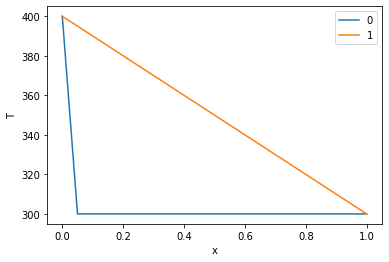

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for T in T_solns:
    plt.plot(grid.xP, T, label=str(i))
    i += 1

plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()

## Solution for One-Dimensional Steady Conduction with External Convection and Dirichlet Boundary Conditions

The code below is an extension of the code for the previous problem, where external convection is added. The same Dirichlet boundary condtions are implemented, and a constant external convection term is added. The convection term is based on Newton's law of cooling where:

$$ q = hA(T - T_\infty) $$

This term is added as a source term to the discretized equation set using the `SurfaceConvectionModel` class, shown below.

In [7]:
class SurfaceConvectionModel:
    """Class defining a surface convection model"""
    
    def __init__(self, grid, T, ho, To):
        """Constructor"""
        self._grid = grid
        self._T = T
        self._ho = ho
        self._To = To
        
    def add(self, coeffs):
        """Function to add surface convection terms to coefficient arrays"""
        
        # Calculate the source term
        source = self._ho*self._grid.Ao*(self._T[1:-1] - self._To)
        
        # Calculate the linearization coefficients
        coeffP = self._ho*self._grid.Ao
        
        # Add to coefficient arrays
        coeffs.accumulate_aP(coeffP)
        coeffs.accumulate_rP(source)
        
        return coeffs

In [8]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 0.1
lz = 0.1
ncv = 10
grid = Grid(lx, ly, lz, ncv)

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
k = 100

# Define convection parameters
ho = 25
To = 200

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
T0 = 300

# Initialize field variable arrays
T = T0*np.ones(grid.ncv+2)

# Define boundary conditions
west_bc = DirichletBc(T, grid, 400, BoundaryLocation.WEST)
east_bc = DirichletBc(T, grid, 300, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each iteration
T_solns = [np.copy(T)]

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, ho, To)

# Iterate until the solution is converged
for i in range(maxIter):
    # Zero the coefficients and add each influence
    coeffs.zero()
    coeffs = diffusion.add(coeffs)
    coeffs = surfaceConvection.add(coeffs)

    # Compute residual and check for convergence 
    maxResid = norm(coeffs.rP, np.inf)
    avgResid = np.mean(np.absolute(coeffs.rP))
    print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
    if maxResid < converged:
        break
    
    # Solve the sparse matrix system
    dT = solve(coeffs)
    
    # Update the solution and boundary conditions
    T[1:-1] += dT
    west_bc.apply()
    east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Iteration = 0; Max. Resid. = 1900.0000000000005; Avg. Resid. = 280.00000000000006
Iteration = 1; Max. Resid. = 8.810729923425242e-13; Avg. Resid. = 4.902744876744691e-13


### Results

It can be seen that the solution is once again converged in a single iteration. Due to the influence of convection, the temperature profile in the domain drops below that for pure conduction.

<div class="alert alert-info">

**Exercise:** Consider again why the solution converges in only one iteration for all problems considered so far.

</div>

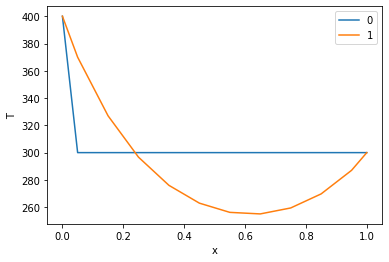

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for T in T_solns:
    plt.plot(grid.xP, T, label=str(i))
    i += 1

plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()

## Solution for One-Dimensional Steady Conduction with External Convection and Dirichlet/Neumann Boundary Conditions

The code below modifies the previous problem by adding a Neumann boundary condition to the east boundary with zero derivative (representing an insulated surface).

In [12]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 0.1
lz = 0.1
ncv = 10
grid = Grid(lx, ly, lz, ncv)

# Set the maximum number of iterations and convergence criterion
maxIter = 1000
converged = 1e-6

# Define thermophysical properties
k = 100

# Define convection parameters
ho = 25
To = 200

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
T0 = 300

# Initialize field variable arrays
T = T0*np.ones(grid.ncv+2)

# Define boundary conditions
west_bc = DirichletBc(T, grid, 400, BoundaryLocation.WEST)
east_bc = NeumannBc(T, grid, 0, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each iteration
T_solns = [np.copy(T)]

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, ho, To)

# Iterate until the solution is converged
for i in range(maxIter):
    # Zero the coefficients and add each influence
    coeffs.zero()
    coeffs = diffusion.add(coeffs)
    coeffs = surfaceConvection.add(coeffs)

    # Compute residual and check for convergence 
    maxResid = norm(coeffs.rP, np.inf)
    avgResid = np.mean(np.absolute(coeffs.rP))
    print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
    if maxResid < converged:
        break
    
    # Solve the sparse matrix system
    dT = solve(coeffs)
    
    # Update the solution and boundary conditions
    T[1:-1] += dT
    west_bc.apply()
    east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Iteration = 0; Max. Resid. = 1900.0000000000005; Avg. Resid. = 280.00000000000006
Iteration = 1; Max. Resid. = 7.105427357601002e-13; Avg. Resid. = 3.520739255691296e-13


### Results

It can be seen that the solution is once again converged in a single iteration and that the derivative reaches zero on the east boundary, due to the thermally insulated boundary condition.

<div class="alert alert-info">

**Exercise:** Consider again why the solution converges in only one 
iteration for all problems considered so far.

</div>

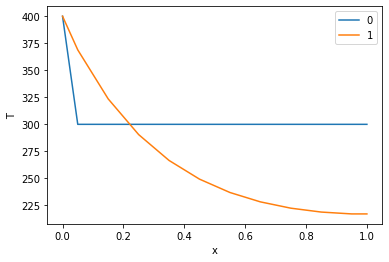

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for T in T_solns:
    plt.plot(grid.xP, T, label=str(i))
    i += 1

plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()

# Next Steps

<div class="alert alert-info">

**Exercise:** For all of the problems above, a fixed grid of 10 control volumes has been used. For each problem, determine the appropriate number of control volumes that should be used.

</div>

Now that you have completed the lesson on , you are ready to move on the next lesson on [Transient One-Dimensional Heat Diffusion](3-TransientDiffusion.ipynb) where we will implement code to solve this type of problem.